In [1]:
import sys, os
from PIL import Image
from pathlib import Path
here = Path("./").parent.resolve()
sys.path.insert(0, str(Path(here).resolve()))
sys.path.insert(0, str(Path(here, "src").resolve()))


In [3]:
import urllib.request
from PIL import Image
from io import BytesIO
my_url = "https://user-images.githubusercontent.com/54370316/268038261-c910bf99-1f42-473e-ac16-b4ceb916209f.png"
with urllib.request.urlopen(my_url) as my_url_res:
   my_img_data = my_url_res.read()

image = Image.open(BytesIO(my_img_data))

In [4]:
from utils import HF_MODEL_NAME, DWPOSE_MODEL_NAME, annotator_ckpts_path
import importlib
import src
from src.controlnet_aux import hed, oneformer, uniformer, scribble, midas, lineart, lineart_anime

np_result = lineart_anime.LineartAnimeDetector.from_pretrained(HF_MODEL_NAME).to("cuda")(image, output_type="np", scribble=True)
import numpy as np
#def pad64(x):
#    return int(np.ceil(float(x) / 64.0) * 64 - x)
#H_pad, W_pad = pad64(np_result.shape[0]), pad64(np_result.shape[1])
#np_result = np.pad(np_result, [[0, H_pad], [0, W_pad], [0, 0]], mode='edge')


torch.Size([1, 64, 256, 512])
torch.Size([1, 128, 128, 256])
torch.Size([1, 256, 64, 128])
torch.Size([1, 512, 32, 64])
torch.Size([1, 512, 16, 32])
torch.Size([1, 512, 8, 16])
torch.Size([1, 512, 4, 8])


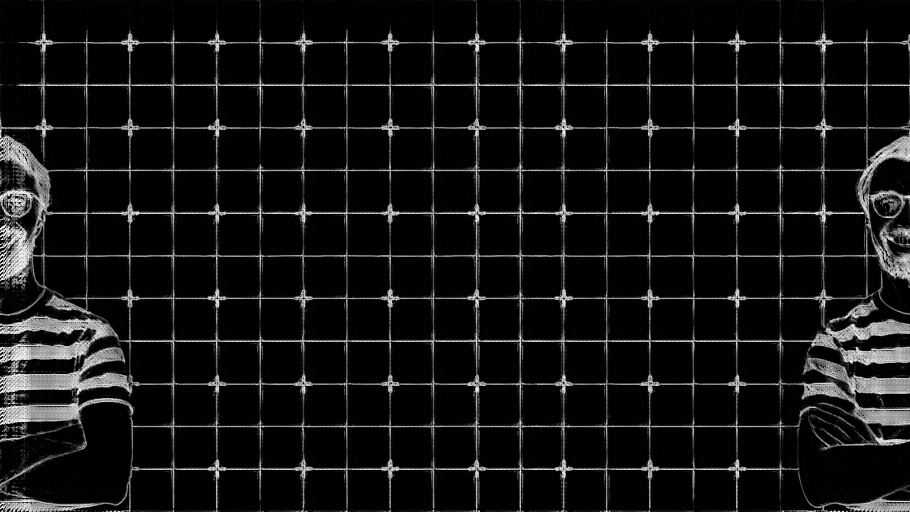

In [17]:
Image.fromarray(np_result)